In [51]:
import pandas as pd
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [86]:
df = pd.read_csv("/data/snsdata.csv")
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [85]:
df = pd.read_csv("/data/snsdata.csv")
df = df[df.index != 14187]

In [87]:
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [88]:
len(['basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'])

36

In [90]:
X = df.iloc[:, 4:]
features = X.columns
X = X.values.astype("float")
X = np.log10(X + 1)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=features).head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.404485,-0.415731,-0.308322,-0.269528,-0.272254,-0.315723,-0.238276,-0.245823,-0.209387,-0.336056,...,-0.22873,-0.430254,-0.550314,-0.34431,-0.22412,-0.199698,-0.364619,-0.299851,-0.248830,-0.202484
1,-0.404485,1.584287,-0.308322,-0.269528,-0.272254,-0.315723,-0.238276,-0.245823,-0.209387,-0.336056,...,-0.22873,1.569447,-0.550314,-0.34431,-0.22412,-0.199698,-0.364619,-0.299851,-0.248830,-0.202484
2,-0.404485,1.584287,-0.308322,-0.269528,-0.272254,-0.315723,-0.238276,-0.245823,-0.209387,-0.336056,...,-0.22873,-0.430254,-0.550314,-0.34431,-0.22412,-0.199698,-0.364619,2.644943,-0.248830,-0.202484
3,-0.404485,-0.415731,-0.308322,-0.269528,-0.272254,-0.315723,-0.238276,-0.245823,-0.209387,-0.336056,...,-0.22873,-0.430254,-0.550314,-0.34431,-0.22412,-0.199698,-0.364619,-0.299851,-0.248830,-0.202484
4,-0.404485,-0.415731,-0.308322,-0.269528,-0.272254,-0.315723,-0.238276,-0.245823,-0.209387,-0.336056,...,-0.22873,-0.430254,2.306466,-0.34431,-0.22412,-0.199698,-0.364619,-0.299851,3.020649,3.700653


In [91]:
k = 5
kmeans = cluster.KMeans(n_clusters=k, random_state=1)
y = kmeans.fit_predict(X)

In [92]:
distances = metrics.euclidean_distances(X, kmeans.cluster_centers_)
distances.shape

(30000, 5)

In [93]:
pd.Series(y).value_counts()

1    19691
0     7589
2     1463
4      795
3      462
dtype: int64

In [94]:
pd.DataFrame(distances)

,0,1,2,3,4
0,3.732442,1.745968,7.640540,8.649183,7.042193
1,8.490452,9.172350,9.354376,11.749524,10.876408
2,5.130195,4.364962,7.907722,9.249460,6.775563
3,3.999025,2.642033,7.532713,8.770423,7.228912
4,10.040198,10.247371,7.535990,12.477420,11.477788
5,7.249363,7.034795,8.598293,10.624983,6.119671
6,8.317694,8.231632,10.458024,11.617923,7.000271
7,5.650263,5.080948,7.231154,9.613289,8.286371
8,3.783038,1.217509,7.692689,8.602504,6.987030
9,6.785401,7.343367,8.960686,9.597186,9.575978


In [95]:
distances_min = np.min(distances, axis=1)
distances_min

array([1.74596751, 8.4904522 , 4.36496159, ..., 3.52392958, 2.14967569,
       4.05522543])

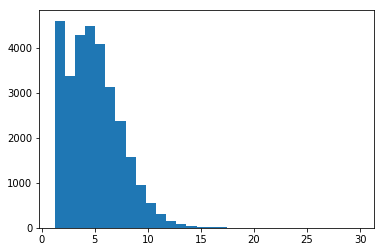

In [96]:
plt.hist(distances_min, bins = 30);

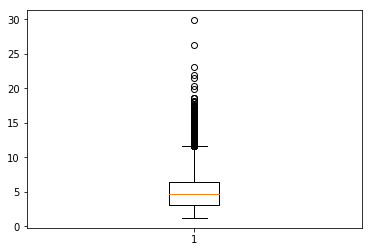

In [97]:
plt.boxplot(distances_min);

Text(0, 0.5, 'Insertia score')

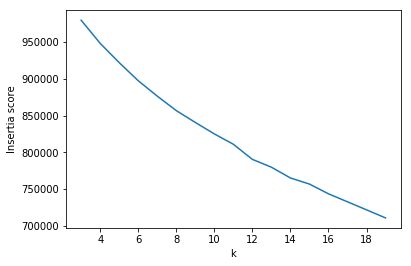

In [98]:
scores = {}
for k in range(3, 20):
    print("%4d" % k, end="\r")
    kmeans = cluster.KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    scores[k] = kmeans.inertia_
    
pd.Series(scores).plot()
plt.xlabel("k")
plt.ylabel("Insertia score")

In [99]:
X_df = pd.DataFrame(scaler.inverse_transform(X), columns=features)
X_df["cluster"] = y

In [100]:
X_df[y==0].median().sort_values(ascending = False)[:5]

music       3.010300e-01
shopping    3.010300e-01
dress       3.469447e-18
tennis      0.000000e+00
kissed      0.000000e+00
dtype: float64

In [101]:
X_df[y==1].median().sort_values(ascending = False)[:5]

cluster     1.000000e+00
shopping    1.387779e-17
dress       3.469447e-18
tennis      0.000000e+00
kissed      0.000000e+00
dtype: float64

In [102]:
X_df[y==2].median().sort_values(ascending = False)[:5]

cluster    2.000000
sex        0.477121
hair       0.477121
kissed     0.301030
drugs      0.301030
dtype: float64

In [103]:
X_df[y==3].median().sort_values(ascending = False)[:5]

cluster    3.00000
bible      0.30103
god        0.30103
church     0.30103
music      0.30103
dtype: float64

In [104]:
X_df[y==4].median().sort_values(ascending = False)[:5]

cluster     4.000000e+00
band        4.771213e-01
marching    3.010300e-01
music       3.010300e-01
shopping    1.387779e-17
dtype: float64